<a href="https://colab.research.google.com/github/SaraPMC/fiap-deep-learning/blob/main/TrabalhoFinal/Exercicio1/TrabalhoFinal_RedesNeuraisMulticamadas_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Redes Neurais Multicamadas**

**Exercício #1**

Utilizando as bibliotecas do Keras e TensorFlow faça:

• Utilizando do dataset Iris (embarcado no scikit-learn, from sklearn
import datasets - datasets.load_iris() ), configure uma Rede Neural MLP
para classificar as amostras de plantas nas 3 classes presentes no
dataset.

• Utilizando o dataset Heart Disease UCI (disponível no repositório da
disciplina e em https://www.kaggle.com/ronitf/heart-disease-uci)
configure uma Rede Neural MLP que classifique as amostras em
saudáveis (coluna target =0) ou não.

• Utilizando o dataset Pulsar Star (disponível no repositório da disciplina e
em https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star/)
construa uma Rede Neural MLP que classifique as amostras em
estrelas de nêutrons ou não.

**Obs.:** os links para os datasets acima está dando 404 not found! Encontramos outros no site https://www.kaggle.com

* Heart Disease UCI: https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci


* Pulsar Star: https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate

# Classificação das amostras de plantas do dataset Iris

In [ ]:
#importando as bibliotecas
from sklearn import datasets
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
#Importando o dataset iris
iris = datasets.load_iris()

In [ ]:
#Separando os dados em X e y, os valores das caracteristicas independentes e dependentes
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Separando entre treino e teste, onde 30% do conjunto é reservado para verificar a precisão do modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
sc_X = StandardScaler()
X_trainscaled = sc_X.fit_transform(X_train)
X_testscaled = sc_X.transform(X_test)

In [ ]:
#Modelagem de 4 camadas ocultas com neuronios diferentes.
#Totalizando 6 camadas considerando as de entrada/saida
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation="relu", random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.9555555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


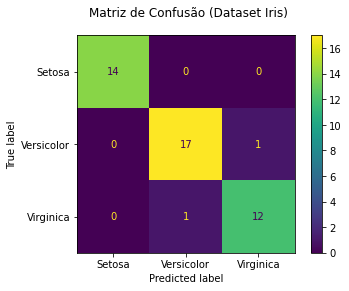

In [ ]:
#Desenhando uma matriz de confusão para entender a classificação
fig=plot_confusion_matrix(clf, X_testscaled, y_test,display_labels=["Setosa", "Versicolor", "Virginica"])
fig.figure_.suptitle("Matriz de Confusão (Dataset Iris)")
plt.show()

# Classificação das amostras em "saudáveis ou não" do dataset Heart Disease UCI

In [80]:
#importando as bibliotecas
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [63]:
#Importando o dataset
heart = pd.read_csv('/content/HeartDiseaseTrain-Test.csv')
heart.head()

#target: Heart disease (0 = no, 1 = yes) / doença no coração

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [33]:
#Tratamento dos dados

In [64]:
print("Unique sex: ")
print(heart["sex"].unique())
heart["sex"] = np.where(heart['sex'] == 'Female', 1, 0)

Unique sex: 
['Male' 'Female']


In [65]:
print("Unique chest_pain_type: ")
print(heart["chest_pain_type"].unique())
heart['chest_pain_type'] = np.where(heart['chest_pain_type'] == 'Non-anginal pain', 0,
                           np.where(heart['chest_pain_type'] == 'Asymptomatic', 1,
                           np.where(heart['chest_pain_type'] == 'Typical angina', 2, 3)))

Unique chest_pain_type: 
['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic']


In [66]:
print("Unique fasting_blood_sugar: ")
print(heart["fasting_blood_sugar"].unique())
heart["fasting_blood_sugar"] = np.where(heart['fasting_blood_sugar'] == 'Greater than 120 mg/ml', 1, 0)

Unique fasting_blood_sugar: 
['Lower than 120 mg/ml' 'Greater than 120 mg/ml']


In [67]:
print("Unique rest_ecg: ")
print(heart["rest_ecg"].unique())
heart['rest_ecg'] = np.where(heart['rest_ecg'] == 'ST-T wave abnormality', -1,
                    np.where(heart['rest_ecg'] == 'Normal', 0, 1))

Unique rest_ecg: 
['ST-T wave abnormality' 'Normal' 'Left ventricular hypertrophy']


In [68]:
print("Unique exercise_induced_angina: ")
print(heart["exercise_induced_angina"].unique())
heart["exercise_induced_angina"] = np.where(heart['exercise_induced_angina'], 1, 0)

Unique exercise_induced_angina: 
['No' 'Yes']


In [69]:
print("Unique slope: ")
print(heart["slope"].unique())
heart['slope'] = np.where(heart['slope'] == 'Downsloping', -1,
                 np.where(heart['slope'] == 'Flat', 0, 1))

Unique slope: 
['Downsloping' 'Upsloping' 'Flat']


In [70]:
print("Unique vessels_colored_by_flourosopy: ")
print(heart["vessels_colored_by_flourosopy"].unique())
heart['vessels_colored_by_flourosopy'] = np.where(heart['vessels_colored_by_flourosopy'] == 'Zero', 0,
                                         np.where(heart['vessels_colored_by_flourosopy'] == 'One', 1,
                                         np.where(heart['vessels_colored_by_flourosopy'] == 'Two', 2,
                                         np.where(heart['vessels_colored_by_flourosopy'] == 'Three', 3, 4))))

Unique vessels_colored_by_flourosopy: 
['Two' 'Zero' 'One' 'Three' 'Four']


In [71]:
print("Unique thalassemia: ")
print(heart["thalassemia"].unique())
heart['thalassemia'] = np.where(heart['thalassemia'] == 'No', 0,
                       np.where(heart['thalassemia'] == 'Normal', 1,
                       np.where(heart['thalassemia'] == 'Reversable Defect', 2, 3)))

Unique thalassemia: 
['Reversable Defect' 'Fixed Defect' 'Normal' 'No']


In [72]:
heart.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,0,2,125,212,0,-1,168,1,1.0,-1,2,2,0
1,53,0,2,140,203,1,0,155,1,3.1,1,0,2,0
2,70,0,2,145,174,0,-1,125,1,2.6,1,0,2,0
3,61,0,2,148,203,0,-1,161,1,0.0,-1,1,2,0
4,62,1,2,138,294,1,-1,106,1,1.9,0,3,3,0


In [74]:
#separando os dados em treino e teste
X = heart.iloc[:,:-1].values
y = heart.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 5)

In [76]:
#We scale the values to between 0 and 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
# Here we create a deep neural network with two hidden layers.
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100,activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 100,activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 1,activation = "sigmoid"))
ann.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [78]:
#We train the neural network here with 100 epoch with batch size of 32 for the backpropagation procedure.
ann.fit(X_train,y_train,batch_size = 32,epochs = 150 )

Epoch 1/150
26/26 [==============================] - 1s 2ms/step - loss: 0.5503 - accuracy: 0.7280
Epoch 2/150
26/26 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8427
Epoch 3/150
26/26 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8585
Epoch 4/150
26/26 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8793
Epoch 5/150
26/26 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.8866
Epoch 6/150
26/26 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.8915
Epoch 7/150
26/26 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.9049
Epoch 8/150
26/26 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.9073
Epoch 9/150
26/26 [==============================] - 0s 1ms/step - loss: 0.2206 - accuracy: 0.9207
Epoch 10/150
26/26 [==============================] - 0s 2ms/step - loss: 0.2002 - accuracy: 0.9305
Epoch 11/

In [79]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

7/7 [==============================] - 0s 2ms/step


In [81]:
#We can check the success of the deep neural network. It predicts all the cases correctly in the test set. We can see from the confusion matrix and accuracy score.
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[103   0]
 [  0 102]]


1.0

# Classificação das amostras em "estrelas de nêutrons ou não" do dataset Pulse Star

In [ ]:
#importando as bibliotecas
import pandas as pd


In [5]:
#Importando o dataset
pulsar = pd.read_csv('pulsar_data_train.csv')
pulsar.head(10)


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0
